In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Importing Data

In [119]:
train=pd.read_csv('G:\\python\\HP\\train.csv')
test=pd.read_csv('G:\\python\\HP\\test.csv')
testf=pd.read_csv('G:\\python\\HP\\test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_id = train["Id"]
test_id = test["Id"]

In [7]:
## now dropping the id col
train.drop("Id", axis = 1, inplace = True)
test.drop("Id",axis = 1, inplace = True)

In [8]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


Text(0.5, 1.0, 'Sale Price Distribution')

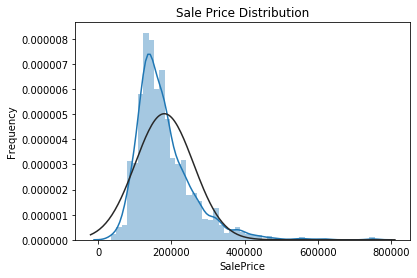

In [9]:
# now looking at the distribution of target variable
sns.distplot(train['SalePrice'] , hist = True, fit = norm)
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

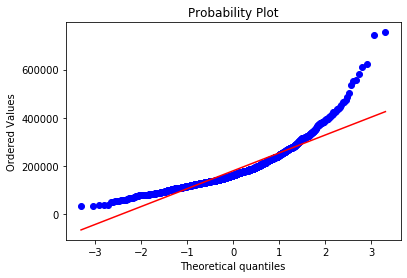

In [10]:
stats.probplot(train['SalePrice'], plot=plt)

In [11]:
# log transformation of target variable
train["SalePrice"] = np.log1p(train["SalePrice"])

Text(0.5, 1.0, 'Sale Price Distribution')

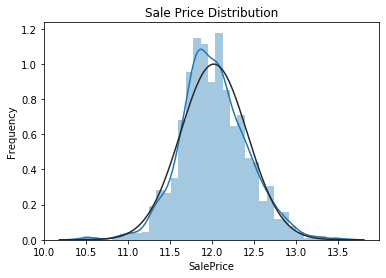

In [12]:
# now again looking at the distribution of sale price
sns.distplot(train['SalePrice'] , hist = True, fit = norm)
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3982596466541509, 12.024057394918403, 0.9953761551826703))

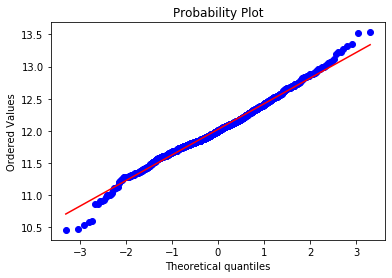

In [13]:
stats.probplot(train['SalePrice'], plot=plt)

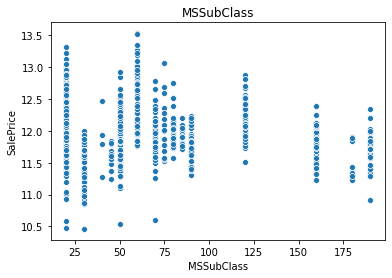

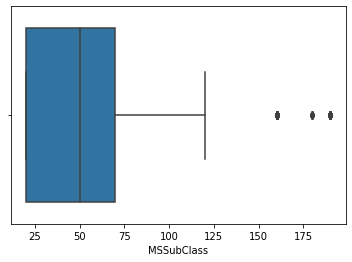

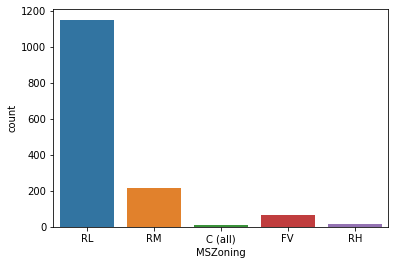

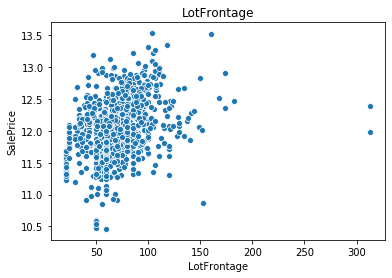

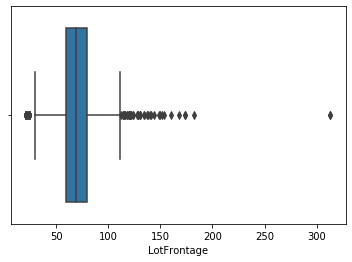

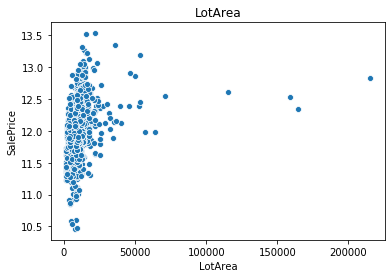

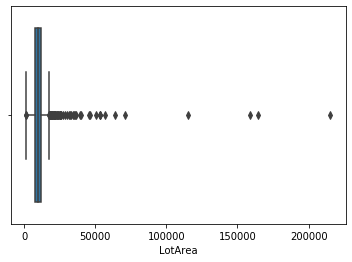

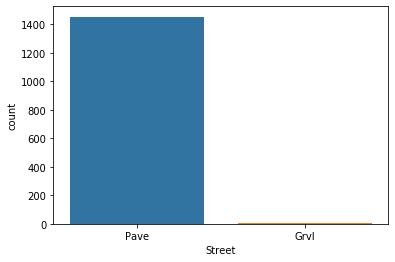

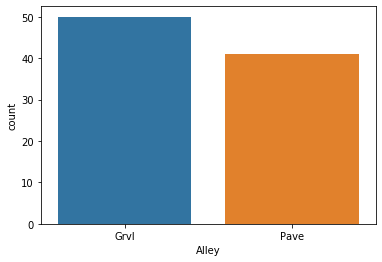

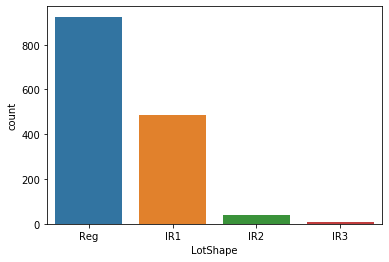

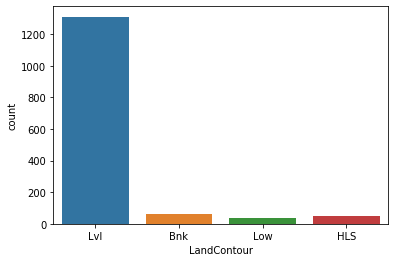

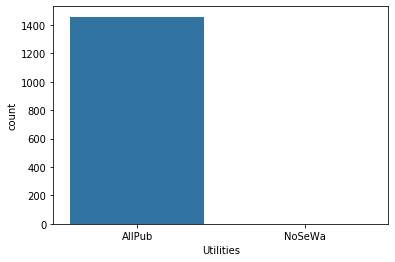

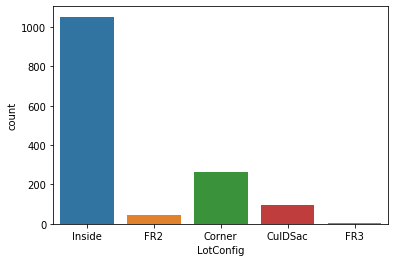

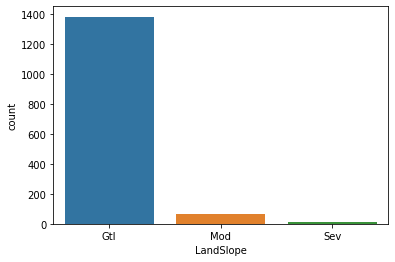

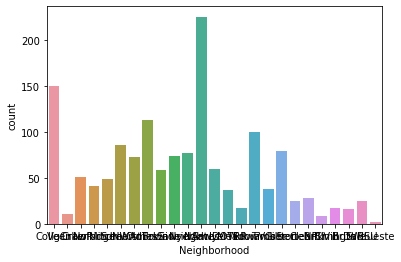

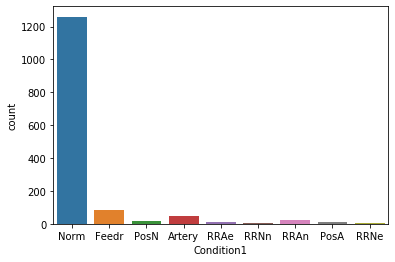

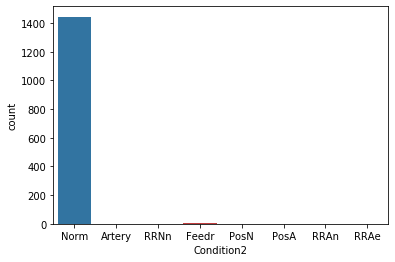

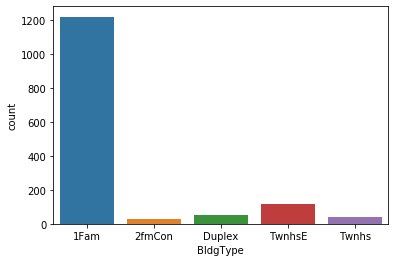

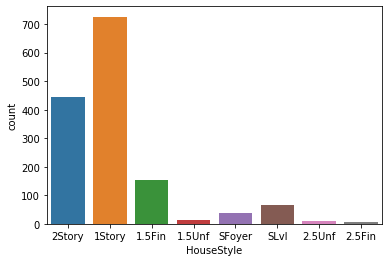

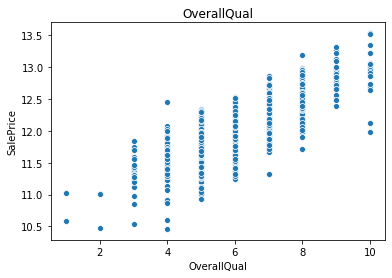

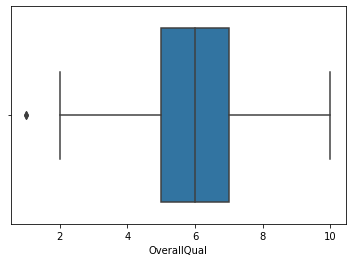

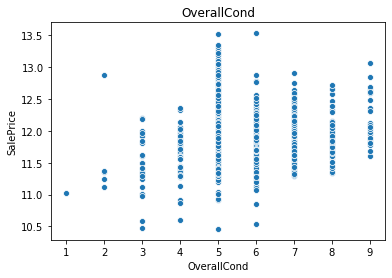

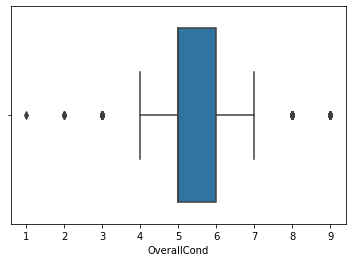

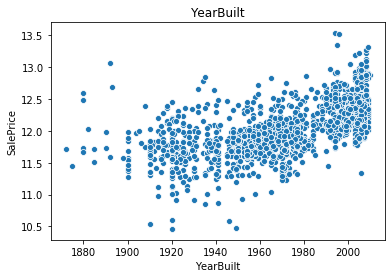

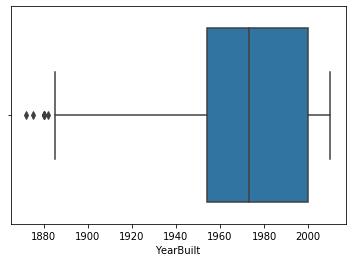

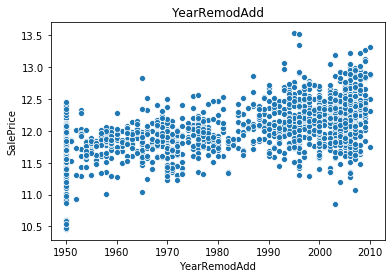

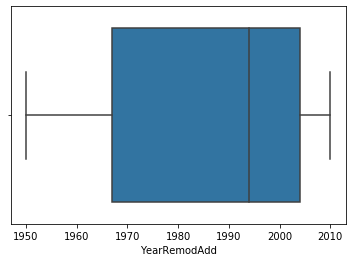

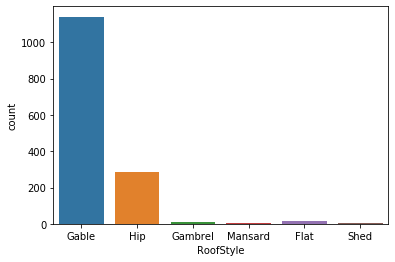

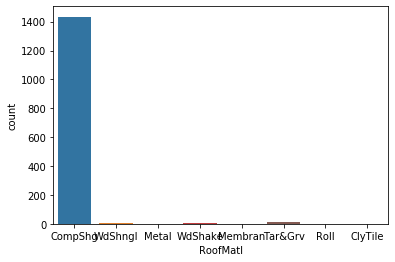

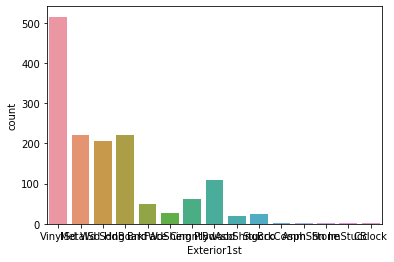

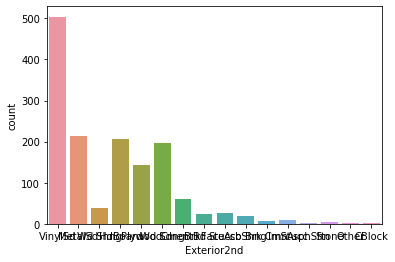

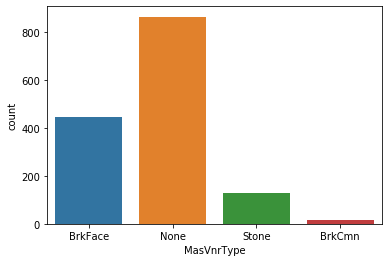

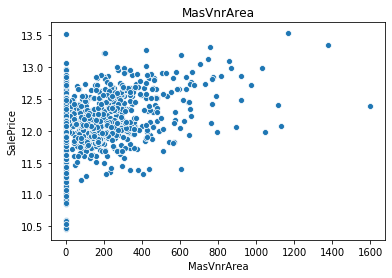

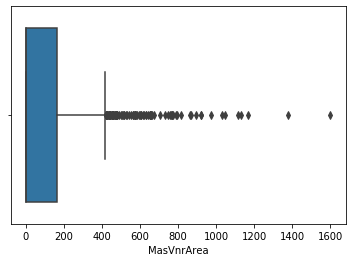

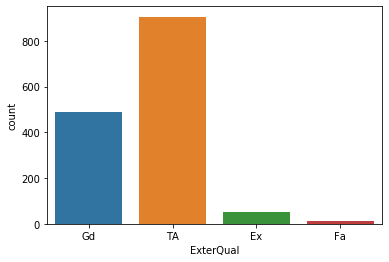

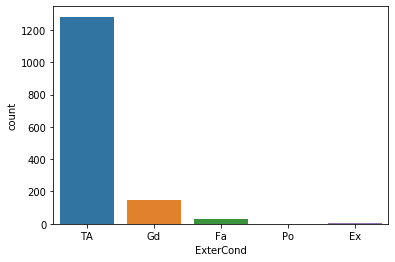

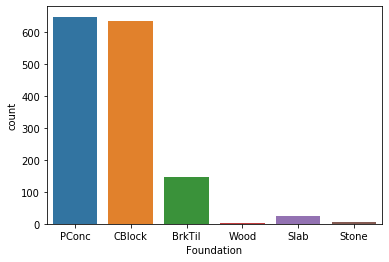

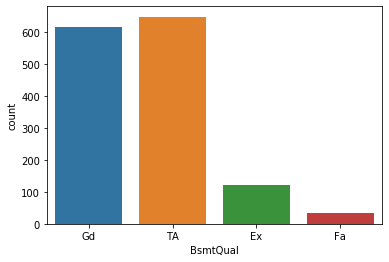

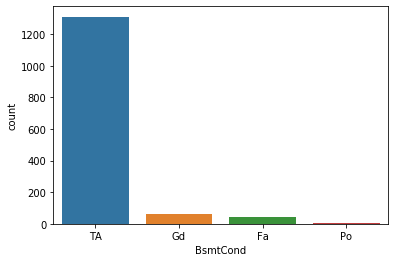

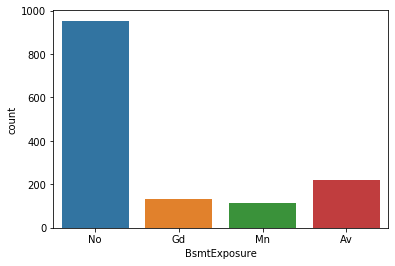

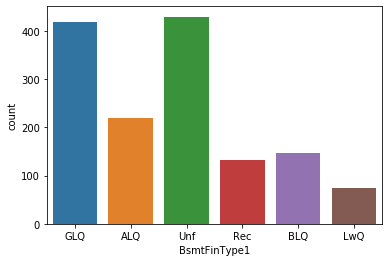

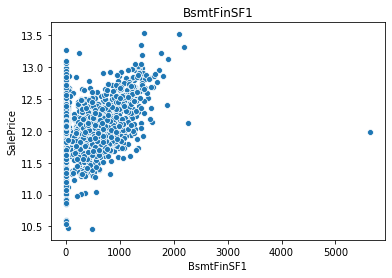

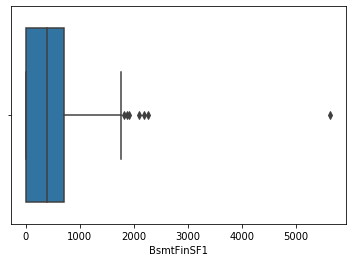

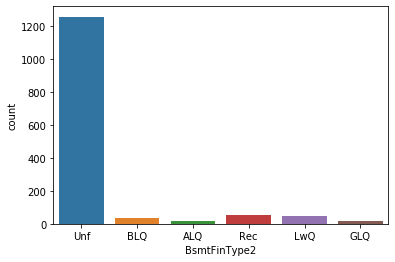

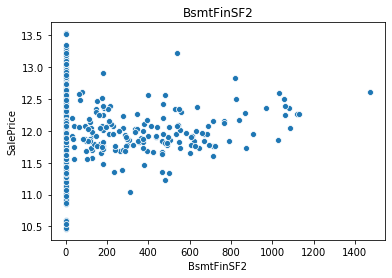

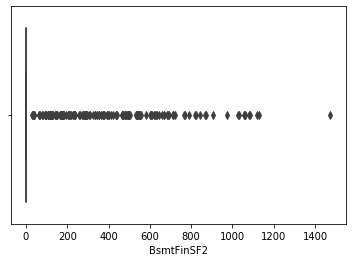

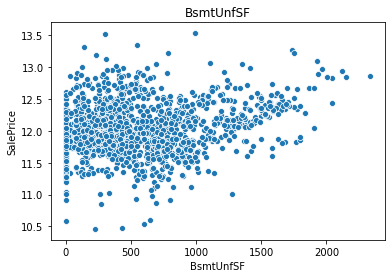

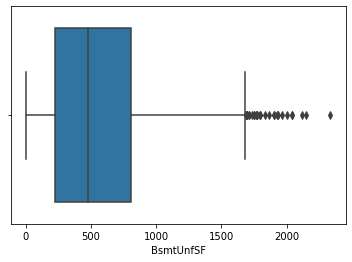

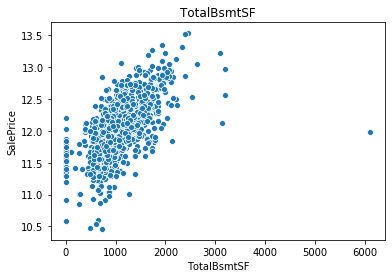

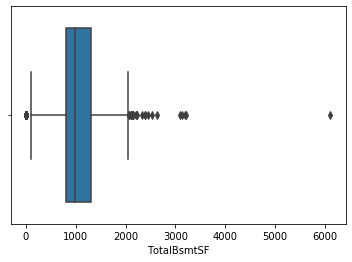

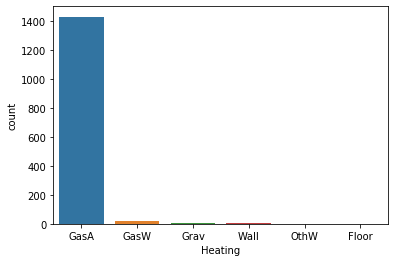

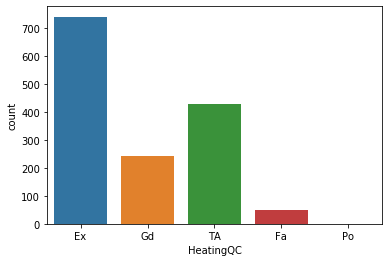

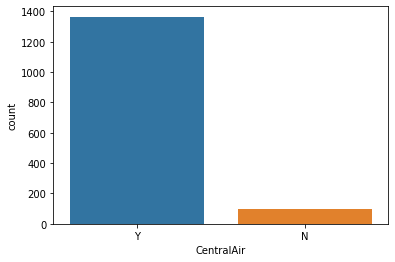

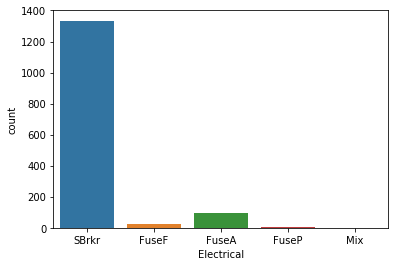

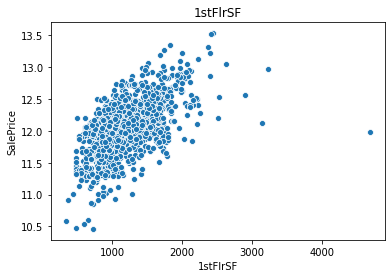

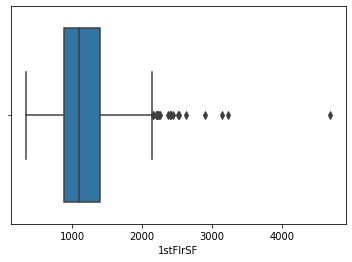

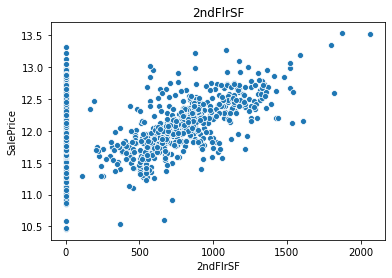

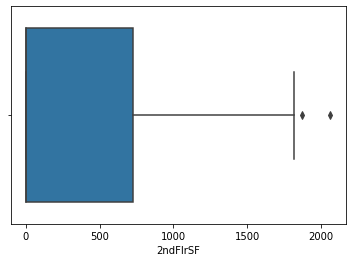

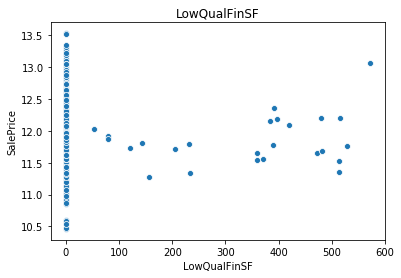

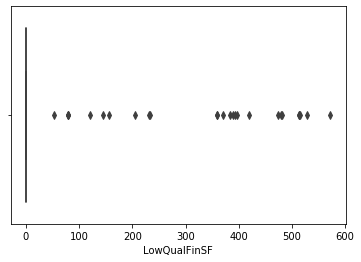

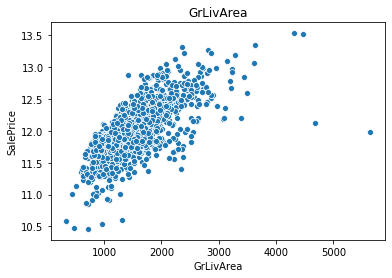

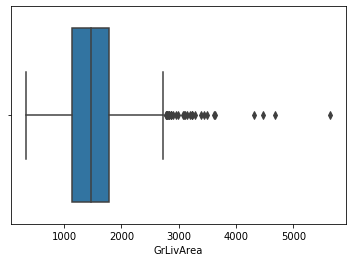

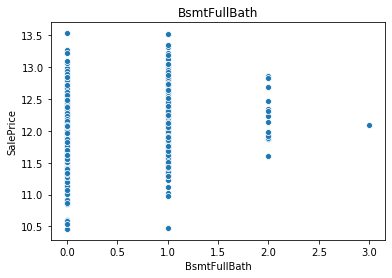

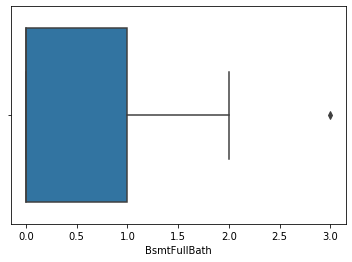

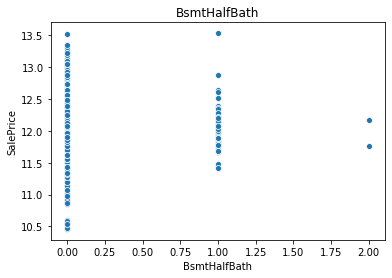

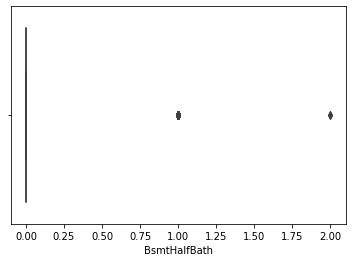

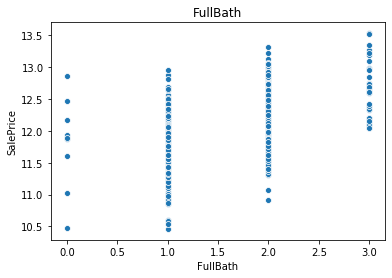

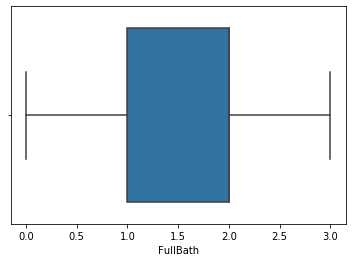

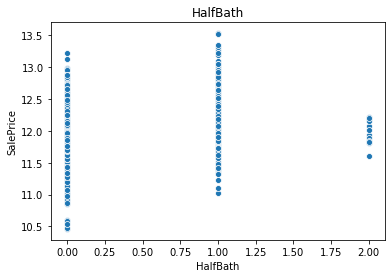

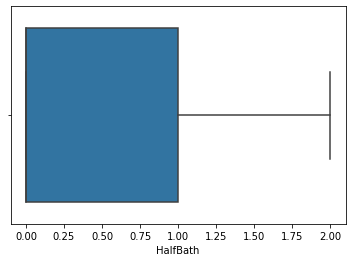

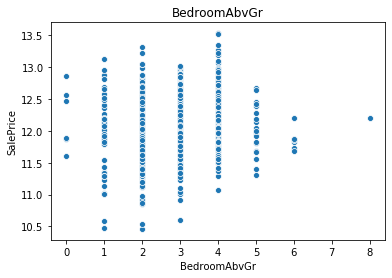

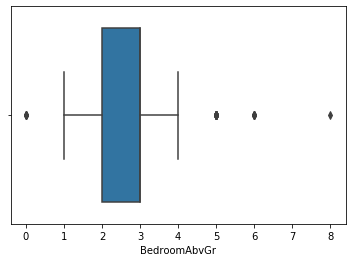

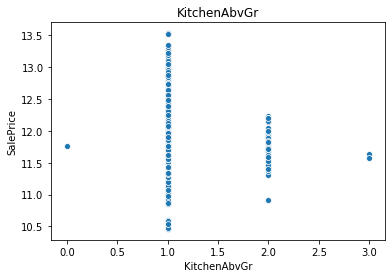

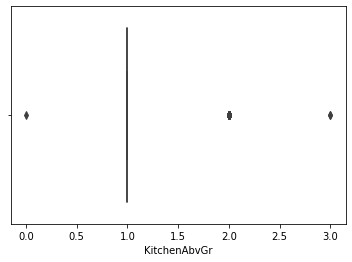

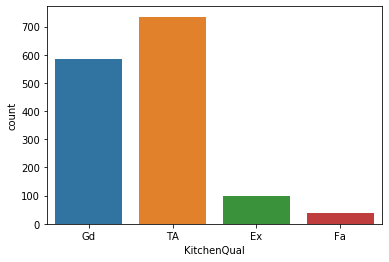

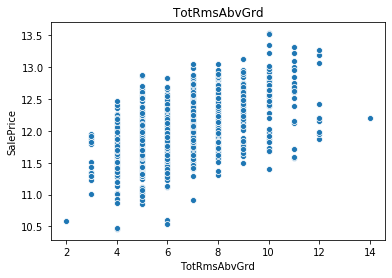

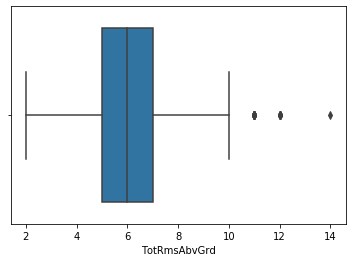

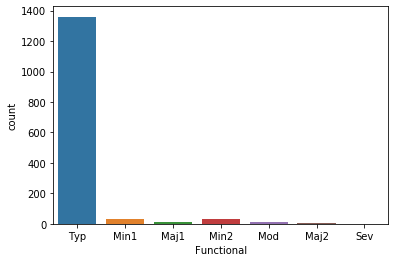

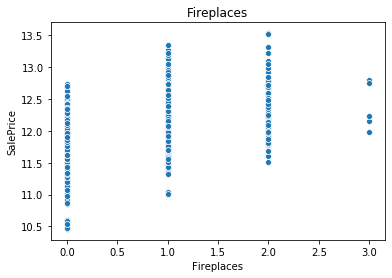

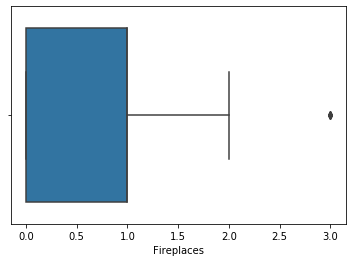

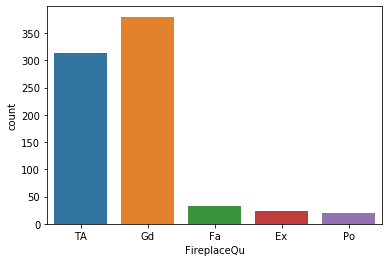

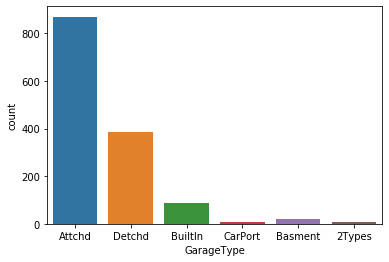

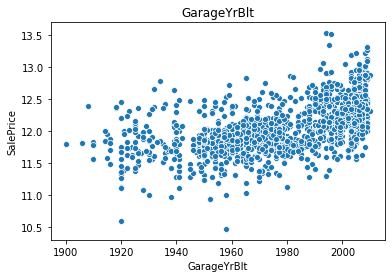

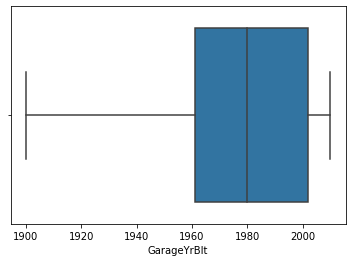

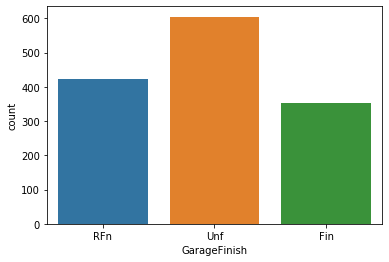

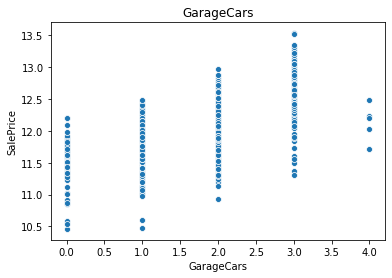

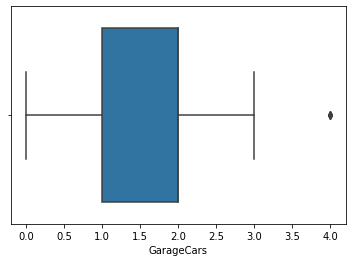

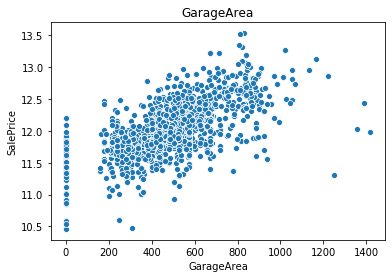

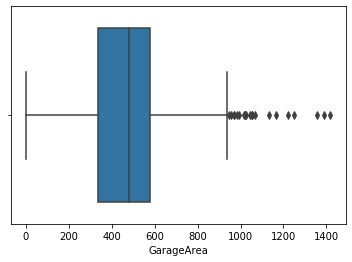

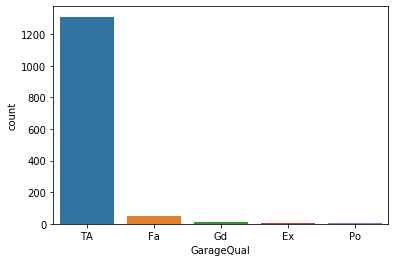

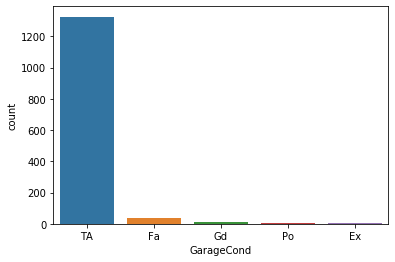

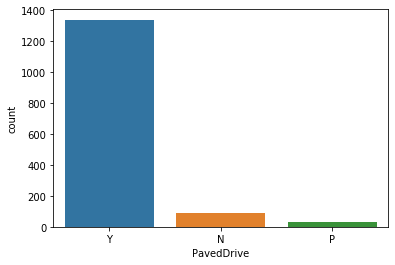

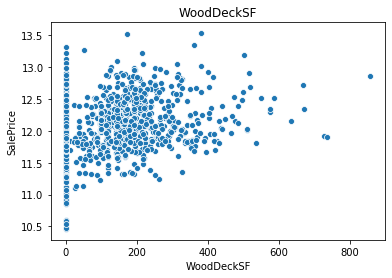

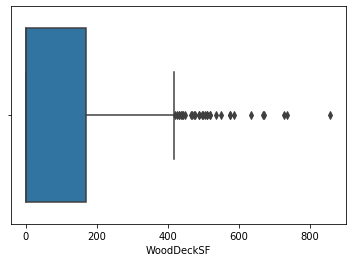

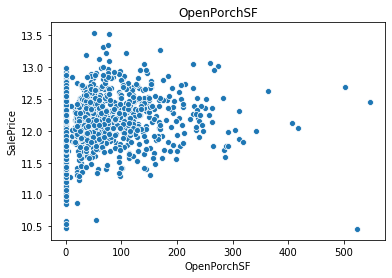

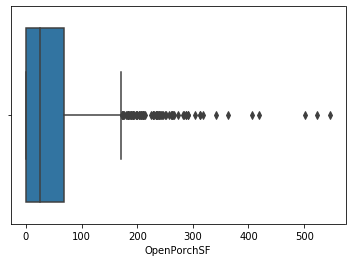

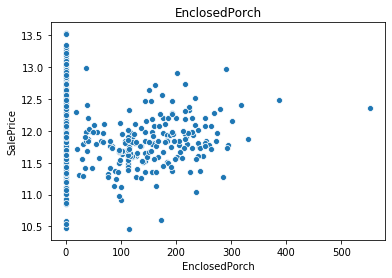

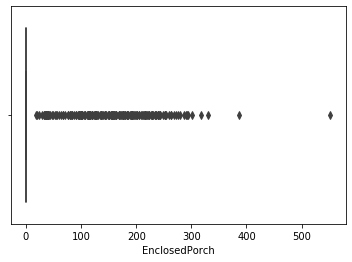

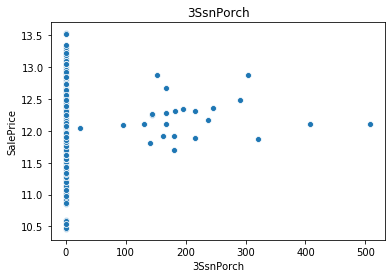

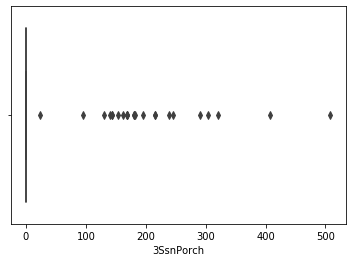

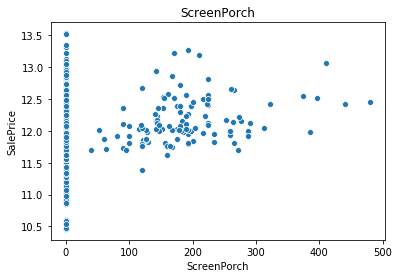

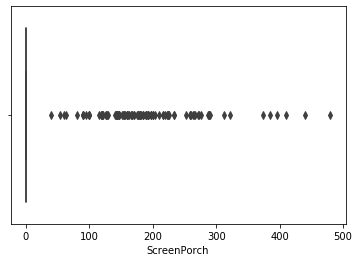

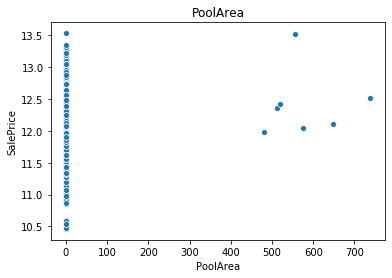

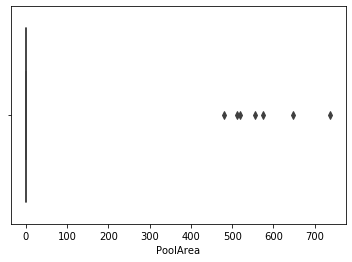

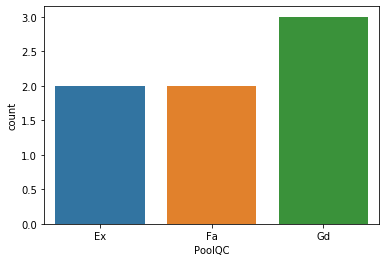

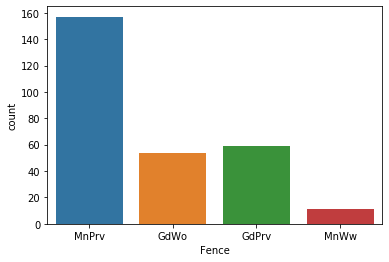

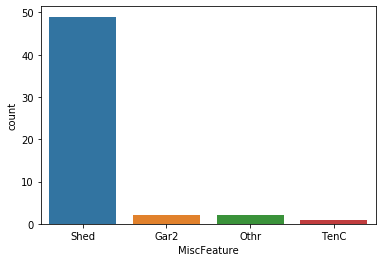

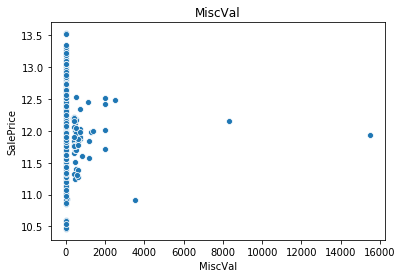

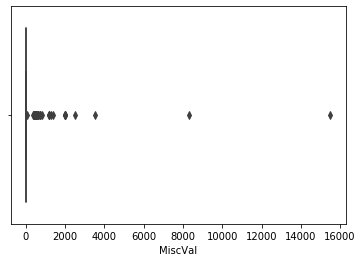

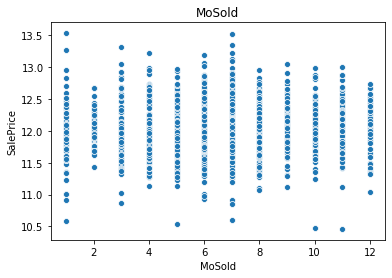

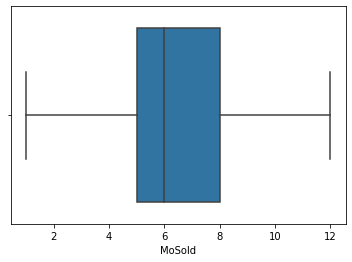

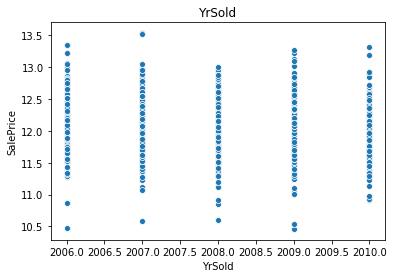

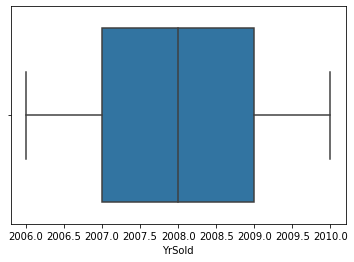

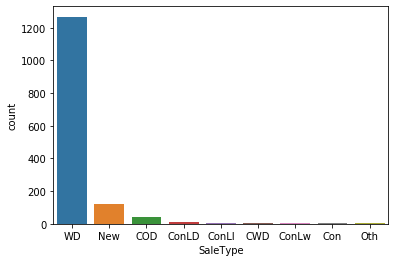

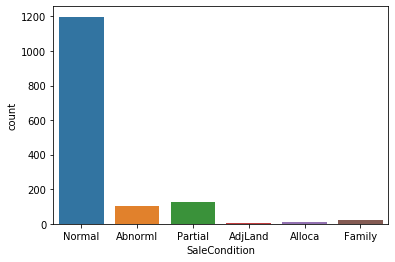

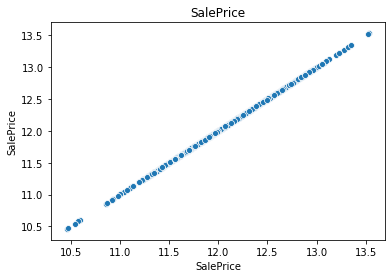

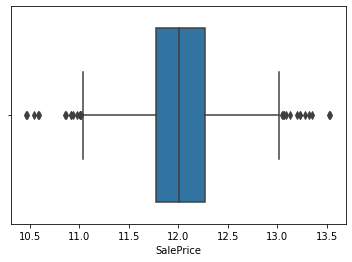

In [14]:
for i in train:
    if train[i].dtypes != 'object':
        plt.title(i)
        sns.scatterplot(x = train[i], y = train['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()
        sns.boxplot(train[i])
        plt.show()
    else:
        sns.countplot(train[i])
        plt.show()

In [15]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [16]:
cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
        'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
       'PoolArea']

In [17]:
for i in cols:
    print(i,np.percentile(train[i],range(1,101)))

LotFrontage [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
LotArea [  1680.     2124.74   2522.     3095.04   3311.7    3862.52   4119.56
   4426.     4576.89   5000.     5355.88   5588.04   5896.7    6000.
   6120.     6253.2    6600.     6872.88   7000.     7078.4    7200.
   7200.     7285.09   7439.28   7553.5    7682.36   7799.65   7868.76
   7937.66   8063.7    8125.     8210.56   8336.88   8400.     8450.
   8500.     8544.     8705.04   8750.05   8793.4    8850.76   8925.78
   9000.     9021.92   9100.     9142.28   9205.46   9300.96   9375.
   9478.5    9550.36   9600.     9600.     9741.44   9794.5    9880.8
   9959.45  10

In [18]:
train[train['LotArea'] > 40000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,12.861001
249,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,12.531776
313,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,12.834684
335,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,12.341263
384,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985,Unf,0,595,1580,GasA,Ex,Y,SBrkr,1079,874,0,1953,1,0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,1992.0,Fin,2,501,TA,TA,Y,216,231,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,12.388398
451,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,12.542548
457,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116,Unf,0,248,1364,GasA,Ex,Y,SBrkr,1663,0,0,1663,1,0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954.0,Fin,2,529,TA,TA,Y,224,137,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,12.452937
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764
661,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1994,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,528.0,Gd,TA,PConc,Gd,Gd,No,GLQ,1361,Rec,180,88,1629,GasA,Ex,Y,SBrkr,1686,762,0,2448,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1994.0,RFn,3,711,TA,TA,Y,517,76,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,12.904210
706,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,

In [19]:
train.LotArea.loc[train.LotArea > 100000] = 100000

# df.column_name.loc[df.column_name > max_value]  = max_value


In [20]:
train.BsmtFinSF2.loc[train.BsmtFinSF2 > 1400] = 1200

In [21]:
train.TotalBsmtSF.loc[train.TotalBsmtSF > 3500] = 3500

In [22]:
train['1stFlrSF'].loc[train['1stFlrSF'] > 4000] = 3500

In [23]:
train['GrLivArea'].loc[train['GrLivArea']> 4500] = 4500

In [24]:
train['WoodDeckSF'].loc[train['WoodDeckSF']> 800] = 750

In [25]:
train.EnclosedPorch.loc[train.EnclosedPorch > 500] = 400

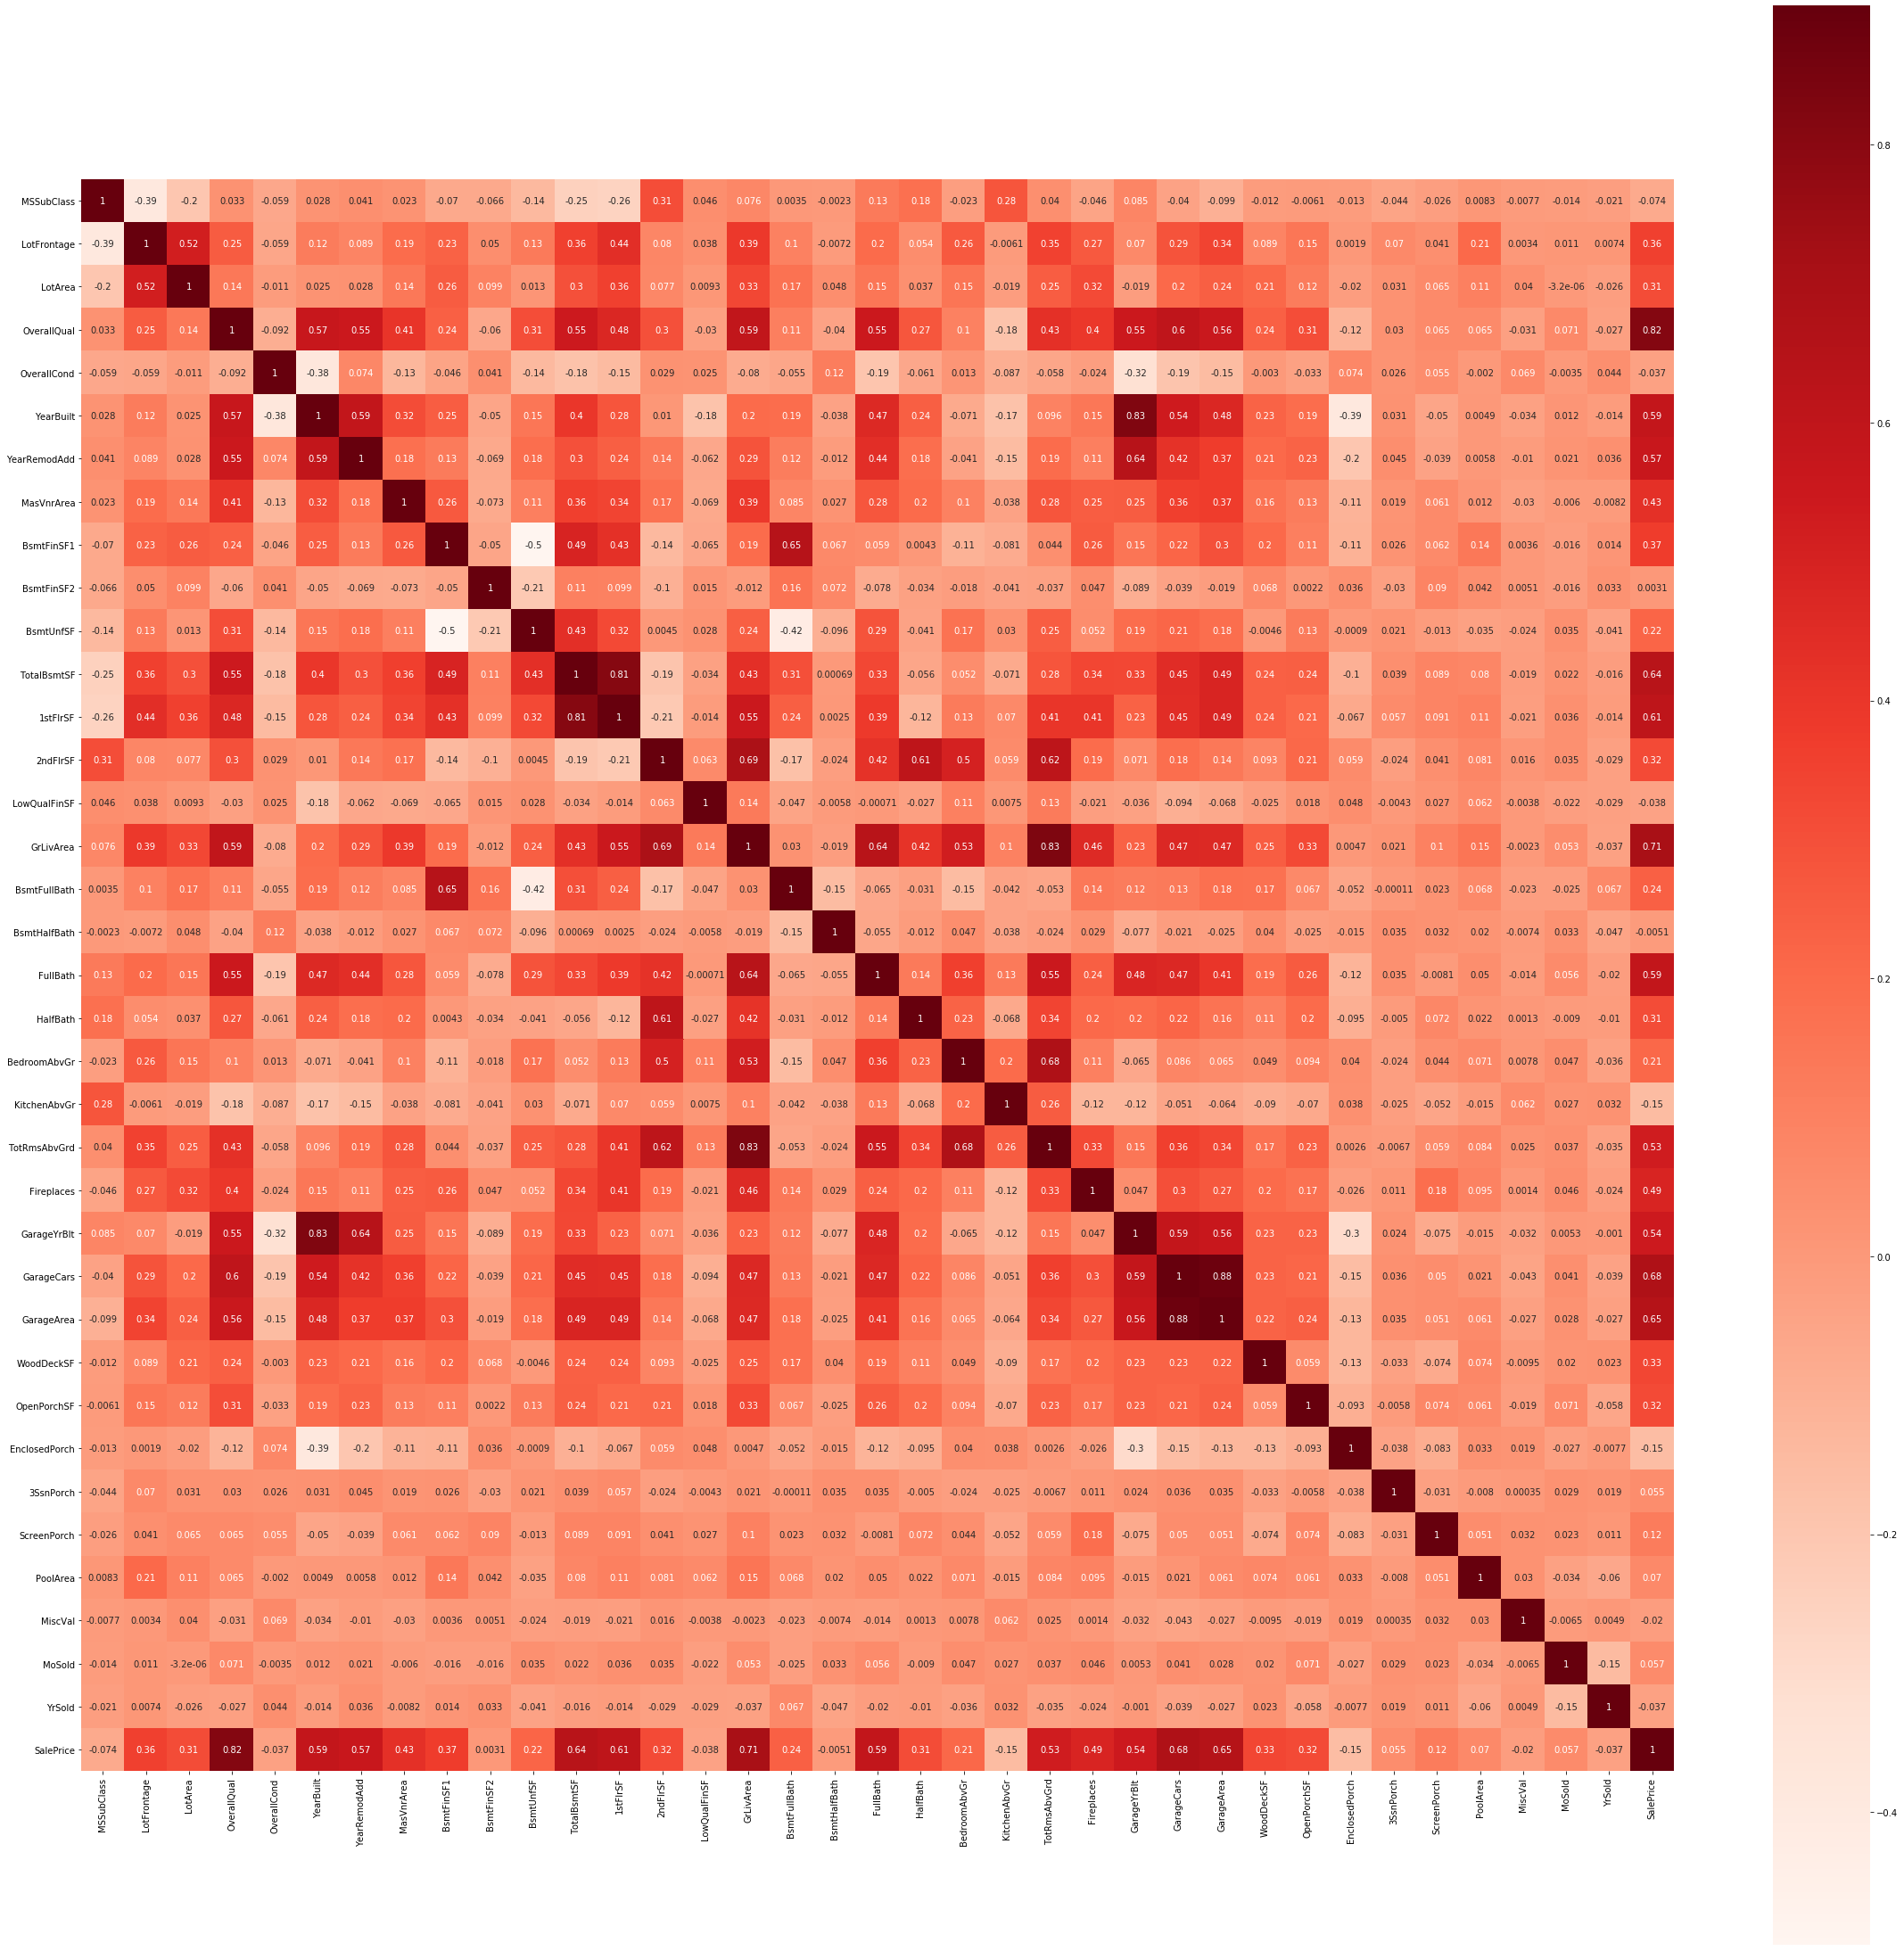

In [26]:
# looking for the corr between vars and sale price
corrmat = train.corr()
plt.subplots(figsize=(40,40))
sns.heatmap(corrmat, vmax=0.9, cmap=plt.cm.Reds, annot = True, square=True)

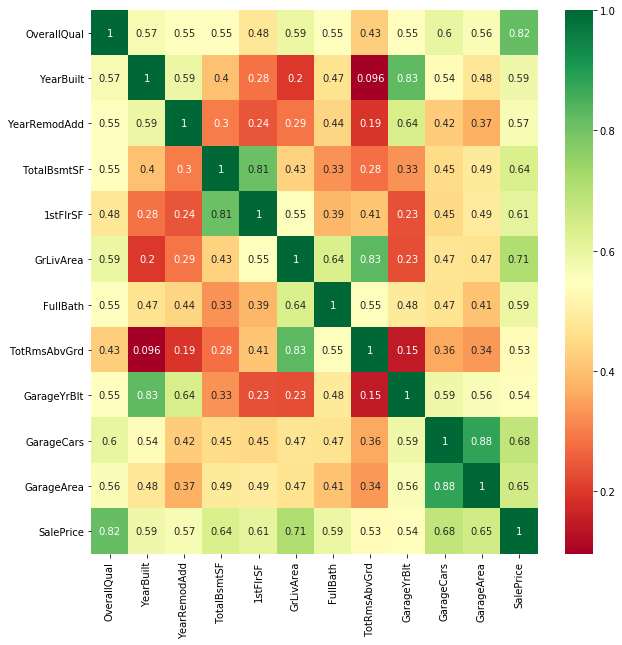

In [27]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.197479,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.066355,-0.140759,-0.247600,-0.256053,0.307886,0.046474,0.075596,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012109,-0.006100,-0.012931,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.521617,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049546,0.132644,0.358376,0.440149,0.080177,0.038469,0.389511,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088975,0.151972,0.001937,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.197479,0.521617,1.000000,0.141086,-0.010722,0.025256,0.028090,0.138278,0.256219,0.098693,0.012861,0.296052,0.359621,0.077014,0.009346,0.328450,0.166968,0.047956,0.152590,0.037437,0.153793,-0.019161,0.246371,0.317841,-0.019309,0.203123,0.242027,0.212189,0.122762,-0.020168,0.030518,0.065072,0.107207,0.039758,-0.000003,-0.025563,0.314045
OverallQual,0.032628,0.251646,0.141086,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.060442,0.308159,0.545662,0.477992,0.295493,-0.030429,0.594994,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238487,0.308819,-0.117781,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.059213,-0.010722,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.041217,-0.136841,-0.175204,-0.145462,0.028942,0.025494,-0.079713,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003041,-0.032589,0.073709,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.123349,0.025256,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.050144,0.149040,0.400706,0.284008,0.010308,-0.183784,0.199215,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.225439,0.188686,-0.389222,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.028090,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.068520,0.181133,0.297032,0.241923,0.140024,-0.062419,0.288780,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.206350,0.226298,-0.196852,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.022936,0.193458,0.138278,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.073447,0.114442,0.361161,0.341951,0.174561,-0.069071,0.388783,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.160590,0.125703,-0.110641,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.069836,0.233633,0.256219,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.049520,-0.495251,0.493404,0.428698,-0.137079,-0.064503,0.192485,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.203227,0.111761,-0.105866,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.066355,0.049546,0.098693,-0.060442,0.041217,-0.050144,-0.068520,-0.073447,-0.049520,1.000000,-0.209763,0.109682,0.099063,-0.102432,0.015088,-0.012087,0.158875,0.071901,-0.078094,-0.033894,-0.017510,-0.040888,-0.036631,0.046658,-0.089279,-0.038991,-0.018965,0.067934,0.002247,0.036305,-0.030140,0.090028,0.042184,0.005089,-0.016084,0.032727,0.003140


In [29]:
# now finding missing values
((train.isnull().sum()/len(train))*100).sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
RoofMatl          0.000000
Exterior1st       0.000000
RoofStyle         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
Condition1        0.000000
Neighborhood      0.000000
LandSlope         0.000000
L

In [30]:
## PoolQC has the highest missing values and acc to data desc 
##NA means no pool which can be the case with maximum houses so filling NA's with "None"

train['PoolQC'] = train['PoolQC'].fillna('None')

In [31]:

## filling missing val in MiscFeature col here data desc say na means no misc feature
train["MiscFeature"] = train["MiscFeature"].fillna("None")

In [32]:

## Alley : data description says NA means "no alley access"
train["Alley"] = train["Alley"].fillna("None")

In [33]:
## Fence : data description says NA means "no fence"
train["Fence"] = train["Fence"].fillna("None")

In [34]:
## FireplaceQu : data description says NA means "no fireplace"
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")

In [35]:
## LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses 
## in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [36]:

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

In [37]:
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(0)
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

In [38]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'):
    train[col] = train[col].fillna('None')

In [39]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [40]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [41]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [50]:
train.shape

(1460, 80)

In [52]:
train_t=train.drop(["SalePrice"],axis=1)

In [53]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [54]:
L=LabelEncoder()
for i in train_t:
    if train_t[i].dtypes=='object':
      train_t[i]=L.fit_transform(train_t[i].astype(str))

In [55]:
SK=StandardScaler()
SK.fit(train_t)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
train_t.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4


In [57]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA(n_components=8)
Pc=pca.fit_transform(train_t)
pca.explained_variance_ratio_

array([9.69606777e-01, 8.43767960e-03, 6.10608984e-03, 5.05620850e-03,
       4.38778601e-03, 3.54705908e-03, 9.06664089e-04, 5.55132232e-04])

In [59]:
pc_data=pd.DataFrame(Pc,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8'])

In [60]:
x=pc_data
y=train["SalePrice"]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.3,random_state=246)

In [61]:
x.head(20)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
0,-1888.609074,73.794913,-276.224065,757.328985,-150.261109,-91.459170,-175.566517,1.536222
1,-735.280575,-34.728826,746.249741,242.069511,-37.214219,-27.332766,-76.319170,18.913762
2,910.274295,121.479061,-462.521880,422.822054,-120.865181,-123.119302,-168.384771,1.503956
3,-797.194313,24.906874,-569.581471,196.140236,-96.714727,-194.150949,18.292294,-50.606698
4,3942.233293,613.977143,-509.062787,544.596448,-125.255474,-11.265948,-178.539023,-45.531115
5,3761.425317,-550.813116,-86.943653,692.190671,530.253242,-188.774916,-177.981084,20.279388
6,-217.916382,713.938790,1074.086160,383.549325,-3.786239,162.317611,-37.915491,-37.324019
7,64.380898,501.382592,-298.881070,868.754662,205.816854,98.828588,-117.016261,69.713450
8,-4223.059546,329.354976,-670.012494,-208.296513,-21.187194,-82.984450,-34.778508,41.817171
9,-2931.490425,-396.805234,622.055863,319.043404,-64.112314,-42.419571,-34.965198,3.294138


In [62]:
y.head(20)

0     12.247699
1     12.109016
2     12.317171
3     11.849405
4     12.429220
5     11.870607
6     12.634606
7     12.206078
8     11.774528
9     11.678448
10    11.771444
11    12.751303
12    11.877576
13    12.540761
14    11.964007
15    11.790565
16    11.911708
17    11.407576
18    11.976666
19    11.842236
Name: SalePrice, dtype: float64

Modeling

In [72]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

Linear Regression

In [76]:
Lr=LinearRegression()

In [77]:
Lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
Lr.score(train_x, train_y)

0.6581956430046436

In [80]:
Lr_Pred=Lr.predict(train_x)
Lr_Pred

array([12.38254649, 12.14708326, 11.88189015, ..., 11.95928088,
       12.19385439, 12.43601293])

Ridge Regression

In [81]:
RD=Ridge()
RD.fit(train_x,train_y)
RD.score(train_x,train_y)

0.6581956430046437

GradientBoostingRegressor

In [82]:
GR=GradientBoostingRegressor(n_estimators=500,alpha=0.5)
GR.fit(train_x,train_y)
GR.score(train_x,train_y)

0.9755548606011617

In [83]:
perdGR=GR.predict(test_x)
perdGR

array([11.73062922, 11.65307106, 11.83211592, 12.44110016, 12.42290048,
       12.07490756, 12.15966059, 12.24620076, 12.51055913, 12.22344546,
       12.28016061, 11.67919683, 12.03834039, 12.26711573, 12.07660808,
       11.93018896, 11.8377989 , 12.45453976, 12.11008054, 12.28023126,
       11.84724506, 12.50573939, 11.52520149, 11.91887467, 11.46938989,
       11.99872741, 11.56585704, 11.83706611, 11.67532967, 11.66662441,
       11.73943177, 12.11918435, 12.04591637, 11.63714605, 11.79067698,
       11.89414632, 12.59077153, 11.799541  , 11.7539394 , 11.65925793,
       11.86618457, 11.96719519, 12.38261801, 11.79384169, 12.58451532,
       11.9304655 , 12.08038389, 12.95776628, 12.79572271, 11.75191015,
       12.38483399, 12.47696998, 13.00357908, 12.15785859, 12.56713001,
       11.89735794, 11.52824143, 12.22442038, 11.55987874, 12.03794875,
       11.96615572, 11.87762833, 11.72395316, 11.95871699, 13.03965662,
       11.94888397, 12.66763433, 11.97347137, 11.89404612, 12.48

BaggingRegressor

In [84]:
BG=BaggingRegressor()
BG.fit(train_x,train_y)
BG.score(train_x,train_y)

0.9447260739174046

In [85]:
BG_Pred=BG.predict(test_x)
BG_Pred

array([11.51467154, 11.60027312, 11.83357711, 12.11127787, 12.90444465,
       12.23010763, 12.13993033, 12.24556159, 12.37634462, 12.23795019,
       12.27456351, 11.61053462, 12.05740406, 12.1390533 , 12.06041444,
       11.98620347, 11.92428794, 13.19770053, 12.18620587, 12.13671774,
       11.77613401, 12.51918705, 11.49279733, 11.96949946, 11.50583976,
       12.02251775, 11.6614042 , 11.79858418, 11.65753213, 11.63706271,
       11.64804509, 12.17065034, 12.07079692, 11.79050322, 11.86929407,
       11.83838319, 12.61736923, 11.84000331, 11.69285458, 11.58166372,
       11.88283386, 11.95743591, 12.19946413, 11.8609331 , 12.67082108,
       11.93024885, 12.12080537, 12.64973207, 12.62317637, 11.75302487,
       12.40688201, 12.6246914 , 12.82385491, 12.14497793, 12.71573782,
       12.03569061, 11.34416757, 12.11315234, 11.71126292, 11.9697898 ,
       12.15310298, 11.73242359, 11.71477417, 12.0061539 , 13.01427221,
       12.00061936, 12.61467614, 11.68935136, 11.88673318, 12.23

RandomForestRegressor

In [86]:
RF=RandomForestRegressor(n_estimators=100)
RF.fit(train_x,train_y)
RF.score(train_x,train_y)

0.9586184299570214

In [87]:
RF_Pred=RF.predict(test_x)
RF_Pred

array([11.72923159, 11.60024917, 11.67231795, 12.12231009, 12.80451517,
       12.1495037 , 12.14430338, 12.23573361, 12.33657897, 12.21949026,
       12.26029456, 11.70886368, 12.0149284 , 12.179695  , 12.02683352,
       11.93243119, 11.86485102, 12.83854131, 12.18277295, 12.13316465,
       11.7789967 , 12.56271501, 11.56070612, 11.93169488, 11.51512584,
       12.0027148 , 11.69004488, 11.86338201, 11.7086941 , 11.66517095,
       11.66599824, 12.16228936, 12.13327598, 11.89926381, 11.85866841,
       11.74859658, 12.59025056, 11.88658649, 11.64331984, 11.58978455,
       11.92166463, 11.90652322, 12.32772935, 11.83452975, 12.64294111,
       11.9387414 , 12.08202943, 12.61443538, 12.65949348, 11.69065378,
       12.37999478, 12.54260248, 12.76273227, 12.10482026, 12.65762904,
       12.00861621, 11.41802588, 12.19635118, 11.74421095, 12.01551182,
       12.16678286, 11.76467225, 11.75164323, 12.01490032, 12.9286308 ,
       11.97587445, 12.67095175, 11.76495799, 11.83955763, 12.17

DecisionTreeRegressor

In [88]:
DR=DecisionTreeRegressor()
DR.fit(train_x,train_y)
DR.score(train_x,train_y)

0.9999999971307374

In [89]:
DR_Pred=DR.predict(test_x)
DR_Pred

array([11.56077233, 11.72804491, 11.48247657, 12.54254845, 12.84397399,
       12.24289144, 12.13886924, 12.32341558, 12.07767662, 12.36308067,
       12.30138737, 11.75195024, 11.99535779, 11.83138647, 11.48761791,
       11.67420212, 11.74006901, 13.52114084, 12.16003394, 12.16003394,
       11.84223641, 12.69250619, 11.60824474, 11.84223641, 11.28352488,
       11.84940484, 11.69941333, 11.86358938, 11.8167343 , 11.04106411,
       11.64833884, 12.15478461, 12.13216235, 11.83138647, 11.84940484,
       11.8167343 , 12.46997803, 11.78296024, 11.76369197, 11.50792297,
       11.98293534, 11.98293534, 12.24289144, 11.94795585, 12.84397399,
       12.12269647, 12.11833919, 12.51356102, 12.95954087, 11.79811193,
       12.5317764 , 12.14420256, 12.84792916, 12.16525586, 12.46844076,
       11.75587949, 10.93299982, 12.38756052, 11.60824474, 12.08954445,
       11.93164238, 11.68267668, 11.71178452, 12.14950759, 12.51356102,
       11.90497431, 12.76569129, 11.3504183 , 11.75979336, 11.76

ExtraTreesRegressor

In [113]:
ET=ExtraTreesRegressor()
ET.fit(train_x, train_y)
ET.score(train_x, train_y)

0.999999999759682

In [114]:
ET_Pred=ET.predict(test_x)
ET_Pred

array([11.6862469 , 11.60679184, 11.62510982, 12.28868735, 12.85426733,
       11.97619485, 12.14339611, 12.22030299, 12.34429989, 12.22762981,
       12.24842343, 11.70111104, 11.98410938, 12.24048054, 12.02584838,
       11.88725253, 11.86963216, 12.98144788, 12.17447482, 12.21014475,
       11.84154085, 12.54258699, 11.63392967, 11.98917231, 11.55783962,
       11.95221832, 11.69214707, 11.89938454, 11.57847031, 11.65535087,
       11.61221167, 12.22448691, 12.10553944, 11.85228271, 11.89693402,
       11.75718782, 12.51256675, 11.88356256, 11.73303834, 11.52331105,
       11.89262787, 11.8910665 , 12.29750116, 11.83368711, 12.69144044,
       11.91636866, 12.10961231, 12.62701109, 12.65520027, 11.74555224,
       12.41284774, 12.56906928, 12.76964487, 12.14028636, 12.60662472,
       12.08368694, 11.4276451 , 12.12332674, 11.7519837 , 11.9909938 ,
       12.10850833, 11.7699919 , 11.76322913, 12.06855984, 12.94863322,
       11.95667976, 12.75882424, 11.83288261, 11.810042  , 12.32

KNeighborsRegressor

In [116]:
KN=KNeighborsRegressor()
KN.fit(train_x, train_y)
KN.score(train_x, train_y)

0.7639557694985708

In [117]:
KN_Pred=KN.predict(test_x)
KN_Pred

array([11.83255144, 11.72952883, 11.70107568, 12.47286195, 12.58909714,
       12.40679515, 12.05302887, 12.25050738, 12.59170687, 12.18515674,
       12.34395059, 11.86927077, 12.12944544, 12.26118999, 12.12944544,
       12.02897653, 11.79600717, 12.95003522, 12.20463405, 12.11647492,
       11.83172229, 12.28599617, 11.65377615, 11.83485348, 11.62406856,
       12.03796741, 11.71597024, 11.98548829, 11.73410507, 11.62587425,
       11.69205601, 12.20026387, 12.08238896, 12.06598947, 11.86385963,
       11.80465042, 12.54728341, 11.95639954, 11.57539888, 11.48231181,
       11.85924175, 11.83330639, 12.40376442, 11.80834435, 12.46247924,
       12.07688293, 12.08786187, 12.16017296, 12.68854906, 11.48598714,
       12.32798159, 12.29992785, 12.79077059, 12.1150665 , 12.69462063,
       12.13263755, 11.45597363, 12.24329305, 11.66940116, 12.03729802,
       11.76604437, 11.95986418, 11.77380789, 11.90511982, 12.90545135,
       11.92894492, 12.48907629, 11.87164441, 11.86458774, 12.21

EDA on Test Data

Checking duplicate

In [94]:
((test.isnull().sum()/len(test))*100).sort_values(ascending = False)

SaleCondition    0.0
Foundation       0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
BsmtQual         0.0
YearRemodAdd     0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
RoofStyle        0.0
YearBuilt        0.0
Heating          0.0
Utilities        0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
OverallCond      0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
TotalBsmtSF      0.0
HeatingQC        0.0
SaleType         0.0
3SsnPorch        0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

Treatment of outliers

In [95]:
test['PoolQC'] = test['PoolQC'].fillna('None')
test["MiscFeature"] = test["MiscFeature"].fillna("None")
test["Alley"] = test["Alley"].fillna("None")
test["Fence"] = test["Fence"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")

In [96]:
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [97]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinSF1','GarageCars','GarageArea'):
    test[col] = test[col].fillna('None')

In [98]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'):
    test[col] = test[col].fillna('None')

In [99]:
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [100]:
test["Functional"] = test["Functional"].fillna("Typ")

In [101]:
for col in ('BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','GarageYrBlt','MasVnrArea'):
    test[col] = test[col].fillna(0)

In [102]:
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

In [103]:
test["Utilities"] = test["Utilities"].fillna("None")

No null value remain

In [104]:
((test.isnull().sum()/len(test))*100).sort_values(ascending = False) 

SaleCondition    0.0
Foundation       0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
BsmtQual         0.0
YearRemodAdd     0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
RoofStyle        0.0
YearBuilt        0.0
Heating          0.0
Utilities        0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
OverallCond      0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
TotalBsmtSF      0.0
HeatingQC        0.0
SaleType         0.0
3SsnPorch        0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

Checking duplicates

In [105]:
test.duplicated().sum()

0

LabelEncoder

In [107]:
L=LabelEncoder()
for i in test:
    if test[i].dtypes=='object':
      test[i]=L.fit_transform(test[i].astype(str))

In [108]:
SK=StandardScaler()
SK.fit(test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [109]:
pca=PCA(n_components=8)
Pc=pca.fit_transform(test)
pca.explained_variance_ratio_

array([0.93821129, 0.01690922, 0.01368991, 0.01125281, 0.00788713,
       0.00569266, 0.0019246 , 0.00122894])

In [110]:
pct_data=pd.DataFrame(Pc,columns=['pcat1','pcat2','pcat3','pcat4','pcat5','pcat6','pcat7','pcat8'])
pct_data

,pcat1,pcat2,pcat3,pcat4,pcat5,pcat6,pcat7,pcat8
0,1762.645807,-623.572801,474.697327,-330.048190,-224.965107,-54.541361,-137.117698,79.911474
1,4672.186222,7867.104582,9360.346690,1368.984522,-81.619920,-1332.110527,-140.197205,14.692240
2,3993.029312,-421.629526,128.646775,517.980173,-289.155413,148.701766,-317.844140,-104.908902
3,149.618811,-166.010761,-3.643498,451.091775,-224.388443,57.487537,-223.984770,-56.473416
4,-4799.435151,396.146035,-242.010279,-557.358423,43.811273,-250.992271,-9.458750,-84.514357
5,165.266480,-158.282986,-148.399924,657.813120,98.119802,-452.937134,-15.138536,119.764542
6,-1834.813150,241.358582,548.106420,-309.079456,-358.798832,229.494667,-224.915929,-147.319050
7,-1435.394964,-137.275084,-79.083191,386.370092,91.532197,-469.823292,19.954116,93.302997
8,364.705417,78.218204,-53.137670,-479.391216,-127.710408,13.543636,-156.346809,-148.955860
9,-1456.575291,-531.796886,523.856372,-290.726726,-405.822758,216.632454,-219.182778,-48.316805


In [69]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [111]:
r2_score(test_y,RF_Pred)

0.7720918723308956

In [112]:
mean_absolute_error(test_y,RF_Pred)

0.1367448810021565

In [118]:
pred_test_ac=RF.predict(pct_data)
pred_fin=pd.DataFrame(pred_test_ac,columns=["Sales"])



In [121]:
pre_final=pd.concat([testf["Id"],pred_fin],axis=1)

pre_final.to_csv("Final_Sales_PCA.csv",index=False)

In [122]:
%pwd

'C:\\Users\\Govind'